In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls data_original

train_FD002.txt


In [4]:
df = pd.read_csv('data_original/train_FD002.txt', header=None, sep=' ')
print(df.shape)
df = df.iloc[:, :-2]   # 最後2列が不要
column_names = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
df.columns = column_names
df.head()

(53759, 28)


,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [5]:
# 'unit_ID', 'cycles'で並べ替えておく
df = df.sort_values(['unit_ID', 'cycles'])

In [6]:
df['unit_ID'].nunique()

260

In [7]:
# 各unitのlifetime
df_lifetime = pd.DataFrame(df['unit_ID'].value_counts()).reset_index()
print(df_lifetime.shape)
df_lifetime.columns = ['unit_ID', 'lifetime']
df_lifetime = df_lifetime.sort_values('unit_ID').reset_index(drop=True)
df_lifetime

(260, 2)


,unit_ID,lifetime
0,1,149
1,2,269
2,3,206
3,4,235
4,5,154
...,...,...
255,256,163
256,257,309
257,258,143
258,259,205


In [8]:
df_lifetime['lifetime'].describe()

count    260.000000
mean     206.765385
std       46.782198
min      128.000000
25%      174.000000
50%      199.000000
75%      230.250000
max      378.000000
Name: lifetime, dtype: float64

In [9]:
df_lifetime['lifetime'].quantile([i/10 for i in range(11)])

0.0    128.0
0.1    154.0
0.2    166.8
0.3    180.7
0.4    190.0
0.5    199.0
0.6    207.0
0.7    221.0
0.8    239.4
0.9    271.1
1.0    378.0
Name: lifetime, dtype: float64

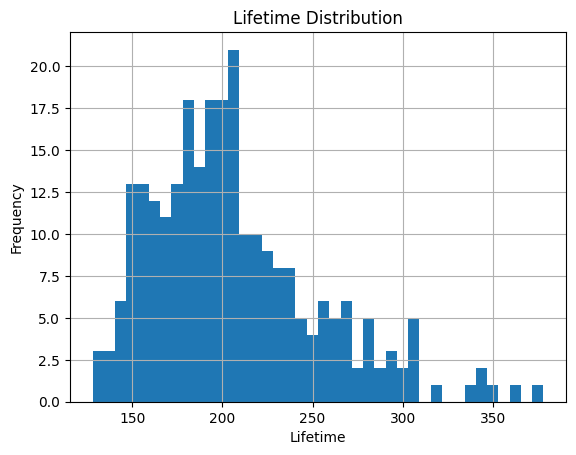

In [10]:
df_lifetime['lifetime'].plot(kind='hist', grid=True, bins=40)

plt.xlabel('Lifetime')  # x軸ラベル
plt.title('Lifetime Distribution')  # グラフのタイトル
plt.show()

In [11]:
tmp = df[df['unit_ID']==1]
tmp

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,145,35.0007,0.8402,100.0,449.44,556.59,1376.19,1152.04,5.48,...,182.61,2387.77,8050.29,9.4189,0.02,338,2223,100.00,14.72,8.8240
145,1,146,10.0006,0.2516,100.0,489.05,605.94,1511.92,1326.50,10.52,...,370.52,2388.43,8113.02,8.7345,0.03,372,2319,100.00,28.16,16.9984
146,1,147,25.0005,0.6200,60.0,462.54,537.50,1268.62,1057.88,7.05,...,164.56,2027.97,7866.66,10.9764,0.02,310,1915,84.93,14.34,8.4476
147,1,148,0.0024,0.0013,100.0,518.67,643.73,1605.33,1425.76,14.62,...,519.76,2388.31,8115.88,8.5240,0.03,397,2388,100.00,38.55,23.0079


In [12]:
# lifetimeカラム
#pd.merge(df, df_lifetime, on='unit_ID', how='left')

In [13]:
# time to deterioration

In [14]:
tmp.shape[0]

149

In [15]:
tmp.shape[0] - tmp['cycles']

0      148
1      147
2      146
3      145
4      144
      ... 
144      4
145      3
146      2
147      1
148      0
Name: cycles, Length: 149, dtype: int64

In [16]:
df['unit_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [17]:
time_to_deterioration = []
for uid in df['unit_ID'].unique():
    tmp = df[df['unit_ID']==uid]
    time_to_deterioration.extend((tmp.shape[0] - tmp['cycles']).to_list())

In [18]:
time_to_deterioration[:10]

[148, 147, 146, 145, 144, 143, 142, 141, 140, 139]

In [19]:
type(time_to_deterioration)

list

In [20]:
len(time_to_deterioration)

53759

In [21]:
df['time_to_deterioration'] = time_to_deterioration

In [22]:
df_ttd = df[['unit_ID', 'cycles', 'time_to_deterioration']]
df_ttd.shape

(53759, 3)

In [23]:
df_ttd

,unit_ID,cycles,time_to_deterioration
0,1,1,148
1,1,2,147
2,1,3,146
3,1,4,145
4,1,5,144
...,...,...,...
53754,260,312,4
53755,260,313,3
53756,260,314,2
53757,260,315,1


<Axes: xlabel='cycles', ylabel='time_to_deterioration'>

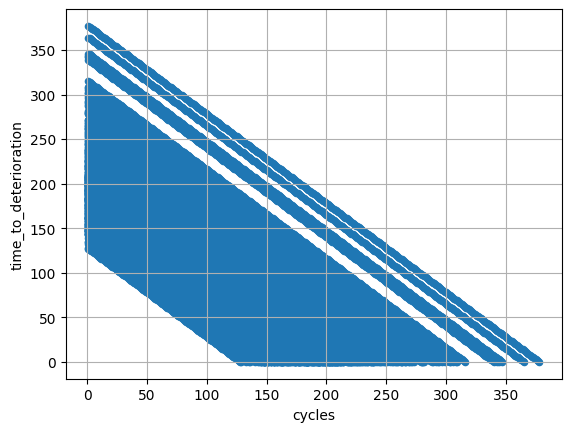

In [24]:
df_ttd.plot(kind='scatter', x='cycles', y='time_to_deterioration', grid=True)#, color='blue')#, marker='.', label='')

In [25]:
# cycles別、time_to_deteriorationの平均値

In [26]:
df_ttd['cycles'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [27]:
mean_at_cycle = []
num_unit = []
for cyc in df_ttd['cycles'].unique():
    tmp = df_ttd[df_ttd['cycles']==cyc]
    mean_at_cycle.append(tmp['time_to_deterioration'].mean())
    num_unit.append(tmp.shape[0])
len(mean_at_cycle), len(num_unit)

(378, 378)

In [28]:
df_avglt = pd.DataFrame({
    'cycles' : df_ttd['cycles'].unique(),
    'survived_unit_num' : num_unit,
    'mean_left_lifetime' : mean_at_cycle
})
df_avglt

,cycles,survived_unit_num,mean_left_lifetime
0,1,260,205.765385
1,2,260,204.765385
2,3,260,203.765385
3,4,260,202.765385
4,5,260,201.765385
...,...,...,...
373,374,1,4.000000
374,375,1,3.000000
375,376,1,2.000000
376,377,1,1.000000


<Axes: xlabel='cycles', ylabel='mean_left_lifetime'>

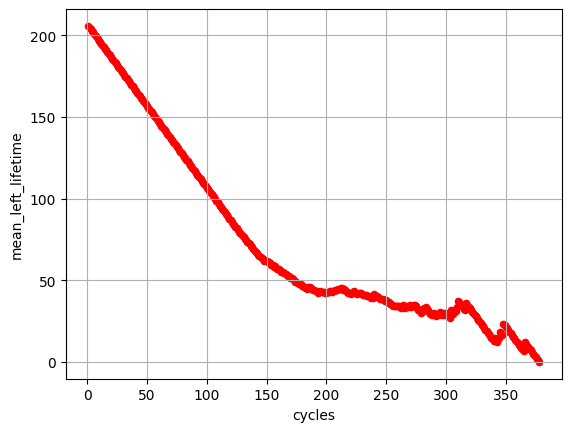

In [29]:
df_avglt.plot(kind='scatter', x='cycles', y='mean_left_lifetime', grid=True, color='red')

In [30]:
#ax = data1.plot(kind='scatter', x='x', y='y', color='blue', marker='o', label='データセット1')
#data2.plot(kind='scatter', x='x', y='y', color='red', marker='x', label='データセット2', ax=ax)

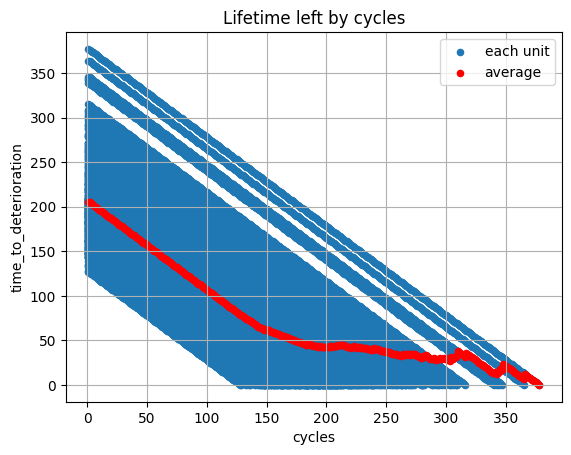

In [31]:
ax = df_ttd.plot(kind='scatter', x='cycles', y='time_to_deterioration', grid=True, label='each unit')
df_avglt.plot(kind='scatter', x='cycles', y='mean_left_lifetime', grid=True, color='red', label='average', ax=ax)

plt.xlabel('cycles')
plt.ylabel('time_to_deterioration')
plt.title('Lifetime left by cycles')
plt.legend()
plt.show()

<Axes: xlabel='cycles', ylabel='survived_unit_num'>

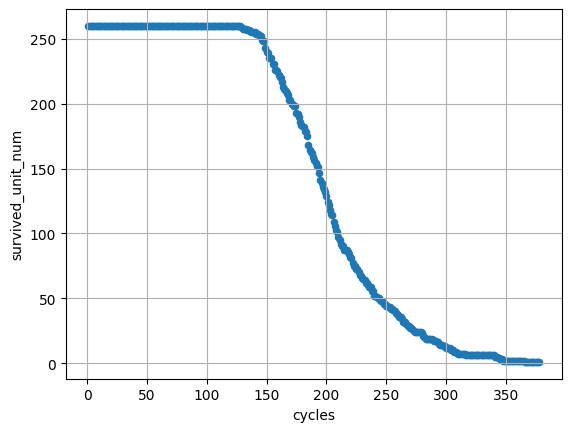

In [32]:
# cycleが増えていくと生き残っているunitが少なくなることに注意
df_avglt.plot(kind='scatter', x='cycles', y='survived_unit_num', grid=True)

In [33]:
df.shape, df_ttd.shape

((53759, 27), (53759, 3))

In [34]:
df.head()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,time_to_deterioration
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


In [35]:
df_ttd.head()

,unit_ID,cycles,time_to_deterioration
0,1,1,148
1,1,2,147
2,1,3,146
3,1,4,145
4,1,5,144


In [38]:
df_final = pd.merge(df_ttd, df.drop('time_to_deterioration', axis=1), on=['unit_ID','cycles'], how='left')
df_final.shape

(53759, 27)

In [39]:
df_final

,unit_ID,cycles,time_to_deterioration,setting_1,setting_2,setting_3,T2,T24,T30,T50,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,148,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,147,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,146,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,145,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,144,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,4,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,3,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,2,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,1,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [40]:
df_final.to_csv('data_modified/iot.csv', index=False)